# 💠 K-Means (K-평균 군집화)

---

## 🧩 1. 개념 설명

**K-Means**는 데이터를 **K개의 그룹(클러스터)**으로 자동 분류하는 **비지도 학습 알고리즘**입니다.  
라벨(정답)이 없는 데이터에서 **유사한 데이터끼리 묶기(Clustering)** 위해 사용합니다.

- 아이디어:  
  “서로 가까운 데이터는 같은 그룹으로 묶자.”
- 핵심 개념:  
  각 그룹의 중심점(centroid)을 반복적으로 계산하여 군집을 형성.

---

## ⚙️ 2. 알고리즘 작동 과정

1. **초기 중심점(K개) 선택**
2. **각 데이터 → 가장 가까운 중심점에 할당**
3. **각 군집의 평균을 구해 새로운 중심점으로 설정**
4. **중심점 변화가 거의 없을 때까지 반복**

### 🎯 수학적 목표
\[
J = \sum_{i=1}^{K} \sum_{x_j \in C_i} ||x_j - \mu_i||^2
\]
> 군집 내 거리 제곱합(= 관성, inertia)을 최소화하는 것이 목표입니다.

---

## 🧮 3. K-Means의 장단점

| 구분 | 내용 |
|------|------|
| ✅ 장점 | 빠르고 단순하며 대용량 데이터에 적합 |
| ⚠️ 단점 | K값(군집 수)을 미리 알아야 함, 이상치와 스케일에 민감 |
| 💡 팁 | `StandardScaler`로 표준화 후 사용하면 성능 향상 |

---

## 🔧 4. 주요 매개변수 (Parameters)

| 매개변수 | 기본값 | 상세 설명 |
|-----------|--------|------------|
| **n_clusters** | `8` | 군집의 개수(K값) 지정. 너무 작거나 크면 성능 저하 가능. |
| **init** | `'k-means++'` | 초기 중심 설정 방법. `'k-means++'`는 수렴 빠르고 안정적. `'random'`은 무작위 선택. |
| **n_init** | `'auto'` (또는 `10`) | 초기화를 여러 번 시도하여 최적의 결과 선택. 값이 클수록 안정적이지만 계산 증가. |
| **max_iter** | `300` | 한 번의 실행에서 최대 반복 횟수. 보통 300~500이면 충분. |
| **tol** | `1e-4` | 중심 이동 변화량이 이 값보다 작으면 수렴. 값이 작을수록 정확하지만 느림. |
| **random_state** | `None` | 결과 재현을 위한 난수 시드. 예: `random_state=42` |
| **algorithm** | `'lloyd'` | K-Means 계산 방식. `'lloyd'`: 기본, `'elkan'`: 속도 향상 가능(밀집 데이터에 유리). |
| **verbose** | `0` | 학습 중 과정 출력 수준. 0=비활성, 1이상이면 반복 로그 표시. |
| **copy_x** | `True` | 입력 데이터를 복사하여 사용 여부. `False`는 메모리 절약 가능하지만 원본이 변할 수 있음. |

---

## 📦 5. 주요 속성 (Attributes)

| 속성 | 설명 |
|------|------|
| **cluster_centers_** | 각 군집의 중심 좌표. shape = (K, n_features) |
| **labels_** | 각 데이터의 소속 군집 번호 (0 ~ K-1) |
| **inertia_** | 군집 내 거리 제곱합. 작을수록 군집이 응집되어 있음 |
| **n_iter_** | 마지막 반복에서의 수행 횟수 |
| **n_features_in_** | 입력 데이터의 특성(feature) 개수 |
| **feature_names_in_** | 입력이 DataFrame일 경우, 사용된 컬럼 이름 목록 |

---

## 🧰 6. 주요 메서드 (Methods)

| 메서드 | 설명 |
|--------|------|
| **fit(X)** | 데이터를 이용해 K-Means 모델을 학습 |
| **predict(X)** | 새 데이터를 입력받아 어떤 군집에 속하는지 예측 |
| **fit_predict(X)** | 학습과 예측을 동시에 수행 |
| **transform(X)** | 각 샘플과 각 중심 간 거리 행렬 반환 |
| **fit_transform(X)** | 적합 + 거리행렬 반환 |
| **score(X)** | `-inertia_` 반환 (값이 클수록 군집 품질이 높음) |
| **get_params() / set_params()** | 매개변수 확인 및 설정 (GridSearchCV 등에서 활용) |

---

## 🧠 7. K값(K-clusters) 결정 방법

| 방법 | 설명 |
|------|------|
| **Elbow Method (엘보우법)** | K 증가에 따른 inertia 감소 그래프에서 “팔꿈치” 지점 선택 |
| **Silhouette Score (실루엣 계수)** | 1에 가까울수록 군집이 잘 분리됨. `silhouette_score(X, labels)` 사용 |

---

| 구분                               | 설명                             |
| -------------------------------- | ------------------------------ |
| **inertia**                      | 군집 내 거리 제곱합 (작을수록 응집↑)         |
| **silhouette_score**             | 응집도+분리도 종합 점수 (1에 가까울수록 좋음)    |
| **calinski_harabasz_score**      | 군집 간 분산 / 군집 내 분산 비율 (높을수록 좋음) |
| **davies_bouldin_score**         | 군집 간 유사도 평균 (낮을수록 좋음)          |
| **adjusted_rand_score**          | 실제 라벨과 군집 일치도 (1=완벽, 0=무작위)    |
| **normalized_mutual_info_score** | 정보이론적 일치도 (1=완벽, 0=무관)         |


📊 [K-Means Clustering Evaluation on Iris]
- Inertia (↓):              140.97
- Silhouette Score (↑):     0.459
- Calinski–Harabasz (↑):    239.34
- Davies–Bouldin (↓):       0.835
- Adjusted Rand Index (↑):  0.620
- Normalized MI (↑):        0.659


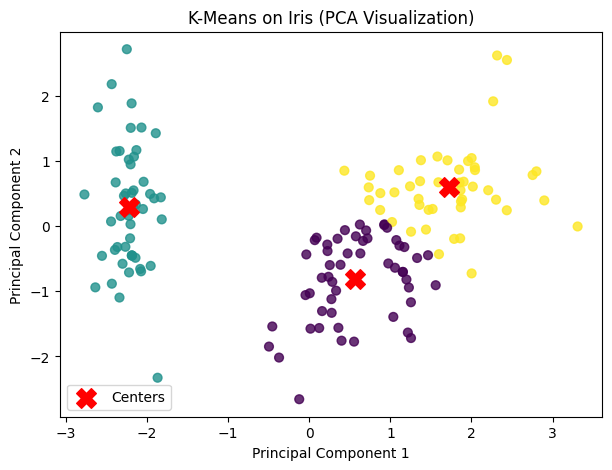

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score
)

# -----------------------------------------------------------
# 1️⃣ 데이터 불러오기 및 전처리
# -----------------------------------------------------------
iris = pd.read_csv("data/iris.csv")
X = iris.drop('target', axis=1).values
y_true = iris['target'].values  # 실제 라벨 (외부지표용)
X_std = StandardScaler().fit_transform(X)

# -----------------------------------------------------------
# 2️⃣ K-Means 모델 학습
# -----------------------------------------------------------
model = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = model.fit_predict(X_std)

# -----------------------------------------------------------
# 3️⃣ 검증 지표 계산
# -----------------------------------------------------------
inertia = model.inertia_  # 군집 내 거리합
silhouette = silhouette_score(X_std, labels)
calinski = calinski_harabasz_score(X_std, labels)
davies = davies_bouldin_score(X_std, labels)
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)

# -----------------------------------------------------------
# 4️⃣ 점수 출력
# -----------------------------------------------------------
print("📊 [K-Means Clustering Evaluation on Iris]")
print(f"- Inertia (↓):              {inertia:.2f}")
print(f"- Silhouette Score (↑):     {silhouette:.3f}")
print(f"- Calinski–Harabasz (↑):    {calinski:.2f}")
print(f"- Davies–Bouldin (↓):       {davies:.3f}")
print(f"- Adjusted Rand Index (↑):  {ari:.3f}")
print(f"- Normalized MI (↑):        {nmi:.3f}")

# -----------------------------------------------------------
# 5️⃣ PCA로 2D 시각화
# -----------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
centers_pca = pca.transform(model.cluster_centers_)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40, alpha=0.8)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            c='red', s=200, marker='X', label='Centers')
plt.title("K-Means on Iris (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


[Validation Scores (K=2..10)]
 K    inertia  silhouette  calinski_harabasz  davies_bouldin    ARI    NMI
 2 94111.8889      0.3391          7571.3076          1.2342 0.0026 0.0028
 3 81849.8759      0.2394          5355.4556          1.6340 0.0311 0.0371
 4 72519.2933      0.2186          4603.5958          1.6910 0.0483 0.0575
 5 67011.9149      0.1863          4011.2490          1.7275 0.0340 0.0412
 6 63907.4266      0.1611          3494.7000          1.7890 0.0314 0.0441
 7 59958.1307      0.1642          3250.7977          1.7634 0.0594 0.0961
 8 57796.1116      0.1567          2961.9336          1.8092 0.0593 0.0997
 9 55667.3736      0.1452          2754.5847          1.8157 0.0616 0.1099
10 53927.8157      0.1415          2575.2756          1.8315 0.0599 0.1098


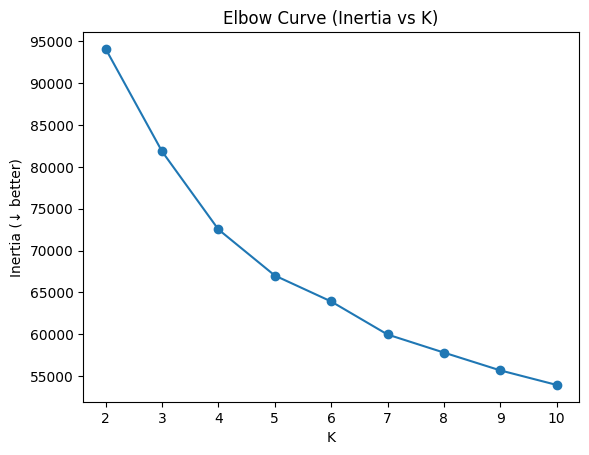

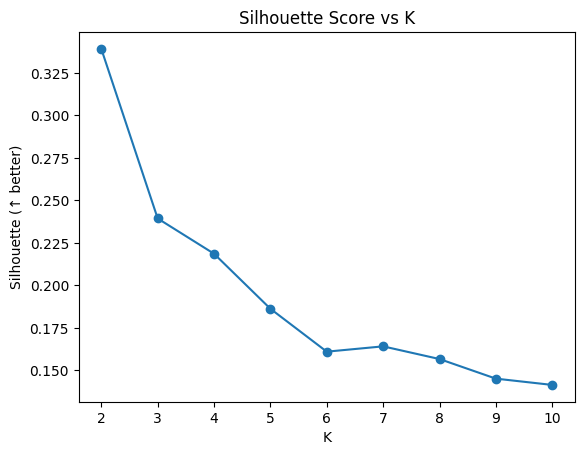


Best K by silhouette: 2

[Final Model Summary]
- K=2: inertia=94111.89 (↓), sil=0.339 (↑), CH=7571.3 (↑), DB=1.234 (↓), ARI=0.003 (↑), NMI=0.003 (↑)
- K=4: inertia=72519.29 (↓), sil=0.219 (↑), CH=4603.6 (↑), DB=1.691 (↓), ARI=0.048 (↑), NMI=0.058 (↑)


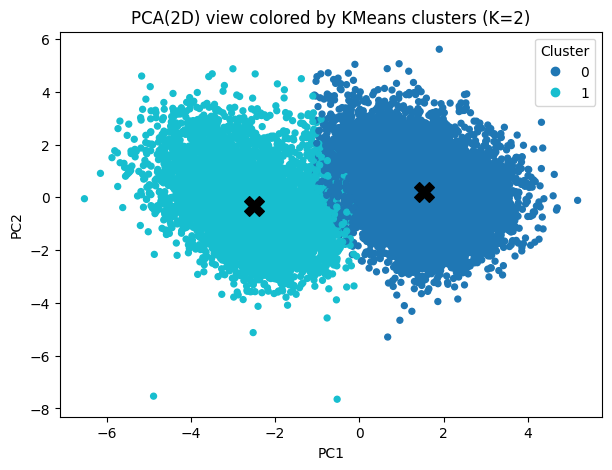

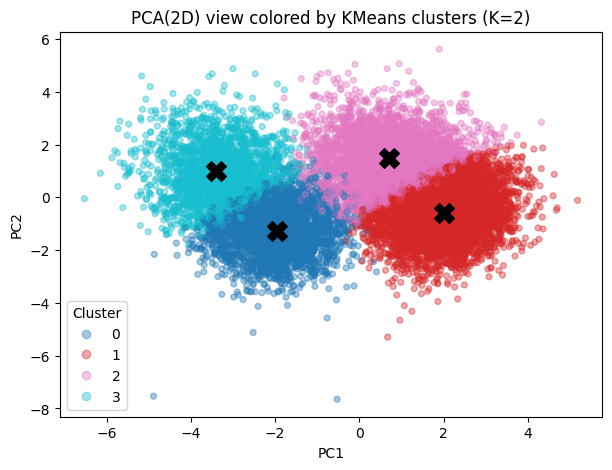

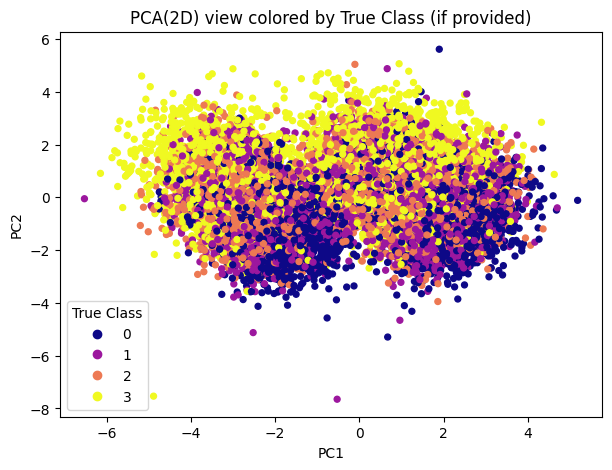

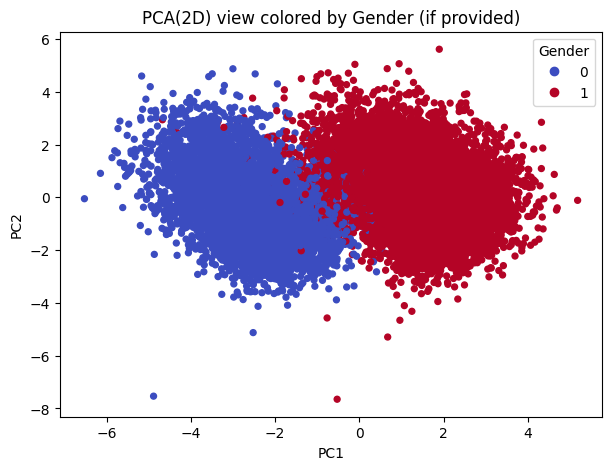

In [ ]:
# kmeans_body_performance.py
# ------------------------------------------------------------
# 1) CSV 로드 → 2) 문자형 인코딩 → 3) 스케일링
# 4) K=2..10 탐색(엘보우/실루엣 + 내부/외부 지표) → 5) 최적 K 선택
# 6) 최종 모델 요약 → 7) PCA 2D 시각화(클러스터/클래스/성별)
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score
)

# =============== 1) 데이터 로드 ==============================
df = pd.read_csv("data/bodyPerformance.csv")

# =============== 2) 문자형 인코딩 ============================
# - KMeans는 수치형만 처리 가능 → object(문자) 컬럼을 숫자화
# - class(A/B/C/D)는 외부 지표 계산을 위해 따로 보관(뒤에서 정수 인코딩)
df = df.copy()

# class 라벨 별도 보관
label_col = "class" if "class" in df.columns else None
y_true = None
if label_col is not None:
    le_class = LabelEncoder()
    y_true = le_class.fit_transform(df[label_col].astype(str).values)
    df = df.drop(columns=[label_col])

# 문자형 → 숫자형 (gender 등)
obj_cols = df.select_dtypes(include="object").columns.tolist()
encoders = {}
for c in obj_cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str).values)
    encoders[c] = le

# 결측치 간단 처리(필요 시 더 정교한 처리 고려)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(axis=0)

# =============== 3) 스케일링 ================================
X = df.values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# =============== 4) K 탐색 & 점수표 ==========================
rows = []
K_range = range(2, 11)  # K=2..10
for K in K_range:
    km = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
    labels = km.fit_predict(X_std)

    inertia = km.inertia_  # Elbow용
    sil = silhouette_score(X_std, labels)
    ch = calinski_harabasz_score(X_std, labels)
    db = davies_bouldin_score(X_std, labels)

    row = {"K": K, "inertia": inertia, "silhouette": sil,
           "calinski_harabasz": ch, "davies_bouldin": db}

    # 외부 지표(실제 라벨이 있을 때만)
    if y_true is not None:
        row["ARI"] = adjusted_rand_score(y_true, labels)
        row["NMI"] = normalized_mutual_info_score(y_true, labels)

    rows.append(row)

scores = pd.DataFrame(rows)
print("\n[Validation Scores (K=2..10)]")
print(scores.round(4).to_string(index=False))

# 그래프: Elbow & Silhouette
plt.figure()
plt.plot(scores["K"], scores["inertia"], marker='o')
plt.title("Elbow Curve (Inertia vs K)")
plt.xlabel("K"); plt.ylabel("Inertia (↓ better)")
plt.xticks(list(K_range))
plt.show()

plt.figure()
plt.plot(scores["K"], scores["silhouette"], marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("K"); plt.ylabel("Silhouette (↑ better)")
plt.xticks(list(K_range))
plt.show()

# =============== 5) 최적 K 선택 ==============================
# 실루엣 최고값 기준
best_k = int(scores.loc[scores["silhouette"].idxmax(), "K"])
print(f"\nBest K by silhouette: {best_k}")

# =============== 6) 최종 모델 적합 & 요약 ====================
final_k_list = sorted(set([best_k, 4]))  # 관례상 K=3 비교도 추가(원치 않으면 제거)
summary = []
for K in final_k_list:
    km = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
    labels = km.fit_predict(X_std)

    inertia = km.inertia_
    sil = silhouette_score(X_std, labels)
    ch = calinski_harabasz_score(X_std, labels)
    db = davies_bouldin_score(X_std, labels)

    line = (f"K={K}: inertia={inertia:.2f} (↓), "
            f"sil={sil:.3f} (↑), CH={ch:.1f} (↑), DB={db:.3f} (↓)")
    if y_true is not None:
        ari = adjusted_rand_score(y_true, labels)
        nmi = normalized_mutual_info_score(y_true, labels)
        line += f", ARI={ari:.3f} (↑), NMI={nmi:.3f} (↑)"
    summary.append(line)

print("\n[Final Model Summary]")
for s in summary:
    print("-", s)

# =============== 7) PCA 2D 시각화 ============================
# 7-1) K=best_k 군집 시각화 (클러스터 라벨 색상)
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_std)

km_best = KMeans(n_clusters=best_k, init='k-means++', n_init=10, random_state=42).fit(X_std)
labels_best = km_best.labels_
centers_2d = pca.transform(km_best.cluster_centers_)

plt.figure(figsize=(7, 5))
sc = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_best, s=18, cmap='tab10')
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], marker='X', s=200, c='black', label='Centers')
plt.title(f"PCA(2D) view colored by KMeans clusters (K={best_k})")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(*sc.legend_elements(), title="Cluster")
plt.show()




km_best = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42).fit(X_std)
labels_best = km_best.labels_
centers_2d = pca.transform(km_best.cluster_centers_)

plt.figure(figsize=(7, 5))
sc = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_best, s=18, cmap='tab10', alpha=0.4 )
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], marker='X', s=200, c='black', label='Centers')
plt.title(f"PCA(2D) view colored by KMeans clusters (K={best_k})")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(*sc.legend_elements(), title="Cluster")
plt.show()
# 7-2) (옵션) 실제 class 라벨로 색상 (있을 때만)
if y_true is not None:
    plt.figure(figsize=(7, 5))
    sc2 = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_true, s=18, cmap='plasma')
    plt.title("PCA(2D) view colored by True Class (if provided)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(*sc2.legend_elements(), title="True Class")
    plt.show()

# 7-3) (옵션) 성별로 색상 (gender 컬럼이 존재할 때만)
gender_col = "gender" if "gender" in df.columns else None
# 주의: df는 class를 제거한 상태. 원본 CSV에서 gender가 문자였으면 위에서 숫자로 인코딩됨(0/1 등).
if gender_col is not None:
    plt.figure(figsize=(7, 5))
    sc3 = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df[gender_col].values, s=18, cmap='coolwarm')
    plt.title("PCA(2D) view colored by Gender (if provided)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(*sc3.legend_elements(), title="Gender")
    plt.show()
